In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [103]:
raw_df = pd.read_csv("D:/Datahack/Big Mart Sales Prediction/train_v9rqX0R.csv")
raw_test = pd.read_csv("D:/Datahack/Big Mart Sales Prediction/test_AbJTz2l.csv")

In [104]:
df = raw_df.copy()
test = raw_test.copy()

In [105]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Removing Item_Identifier and Outlet_Identifier

In [106]:
df = df.drop(['Outlet_Identifier','Item_Identifier','Outlet_Establishment_Year'],axis = 1)

In [107]:
test = test.drop(['Outlet_Identifier','Item_Identifier','Outlet_Establishment_Year'],axis = 1)
test.shape

(5681, 8)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
Item_Weight             7060 non-null float64
Item_Fat_Content        8523 non-null object
Item_Visibility         8523 non-null float64
Item_Type               8523 non-null object
Item_MRP                8523 non-null float64
Outlet_Size             6113 non-null object
Outlet_Location_Type    8523 non-null object
Outlet_Type             8523 non-null object
Item_Outlet_Sales       8523 non-null float64
dtypes: float64(4), object(5)
memory usage: 599.4+ KB


In [109]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.643456,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.773750,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


## Data Preprocessing

In [110]:
df.isnull().sum()

Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
dtype: int64

In [111]:
test.isnull().sum()

Item_Weight              976
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Size             1606
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [112]:
df['Item_Weight'] = df['Item_Weight'].fillna(value=df['Item_Weight'].mean())
df['Outlet_Size'] = df['Outlet_Size'].fillna(method='ffill')

In [113]:
test['Item_Weight'] = test['Item_Weight'].fillna(value=test['Item_Weight'].mean())
test['Outlet_Size'] = test['Outlet_Size'].fillna(method='ffill')

In [114]:
df.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

In [115]:
np.unique(df['Item_Fat_Content'])

array(['LF', 'Low Fat', 'Regular', 'low fat', 'reg'], dtype=object)

In [116]:
np.unique(test['Item_Fat_Content'])

array(['LF', 'Low Fat', 'Regular', 'low fat', 'reg'], dtype=object)

In [117]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('low fat', 'Low Fat', case=False)

In [118]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('LF', 'Low Fat', case=False)
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('reg', 'Regular', case=False)

In [119]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].str.replace('low fat', 'Low Fat', case=False)
test['Item_Fat_Content'] = test['Item_Fat_Content'].str.replace('LF', 'Low Fat', case=False)
test['Item_Fat_Content'] = test['Item_Fat_Content'].str.replace('reg', 'Regular', case=False)

In [120]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('Regularular', 'Regular', case=False)

In [121]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].str.replace('Regularular', 'Regular', case=False)

In [122]:
np.unique(df['Item_Fat_Content'])

array(['Low Fat', 'Regular'], dtype=object)

In [123]:
np.unique(df['Item_Visibility'])

array([0.        , 0.0035747 , 0.0035891 , ..., 0.32111501, 0.32578081,
       0.32839095])

In [124]:
df['Item_Visibility'].mean()

0.06613202877895127

In [125]:
df['Item_Visibility'] = df['Item_Visibility'].replace(0,0.066)
test['Item_Visibility'] = test['Item_Visibility'].replace(0,0.066)

## Data Visualization

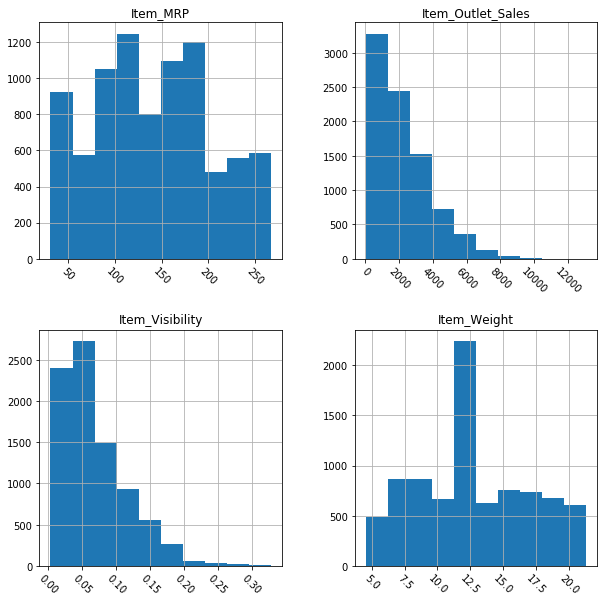

In [126]:
# Plot histogram grid
df.hist(figsize=(10,10), xrot=-45) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

##### Most of the Items sold in market are of low fat content.

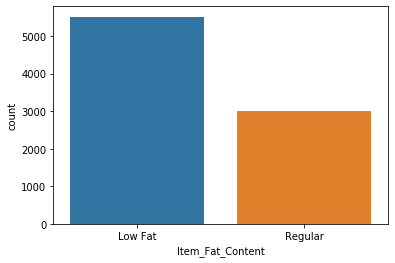

In [127]:
sns.countplot('Item_Fat_Content', data=df)

#### Sales of both low & regular content items almost similar, but the sale of regular fat content is slightly high.

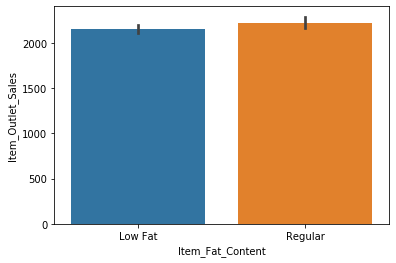

In [128]:
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df)

#### Distribution of the different types of Item present in the outlets.We can see that Fruits & vegetables,Snack Foods are highest 
#### Item types present in outlets while seafood are the lowest item type present.

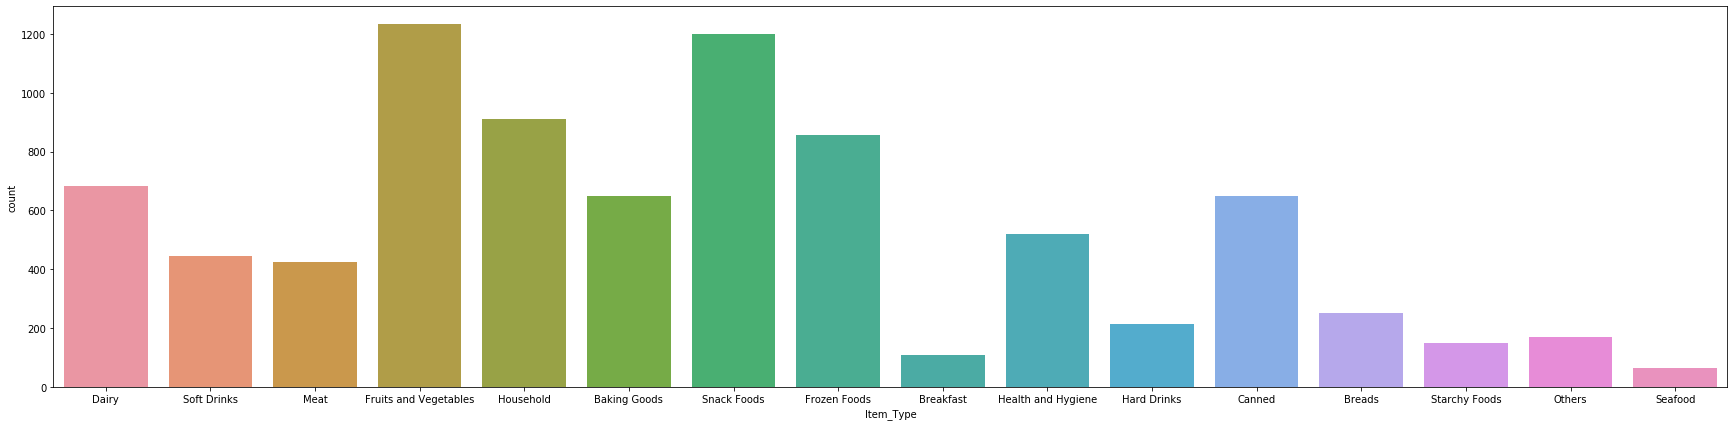

In [129]:
plt.figure(figsize=(30,7))
sns.countplot('Item_Type', data=df)

#### Distribution of outlets based on size.We can see that most of the outlets are of medium size.

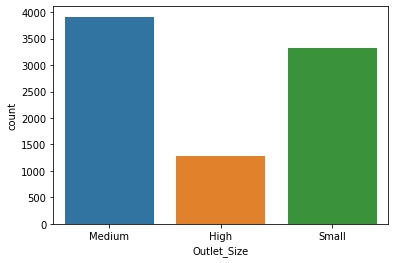

In [130]:
sns.countplot(df['Outlet_Size'])

Sales of different types of items in various locations.From this we can conclude that:
1.Breakfast items and Hard drinks are highest sold in Tier 3 cities.
2.Starchy Food and Seafood are highest sold in Tier 2 cities.
3.Soft Drinks and Meat are lowest sold in Tier 1 cities.

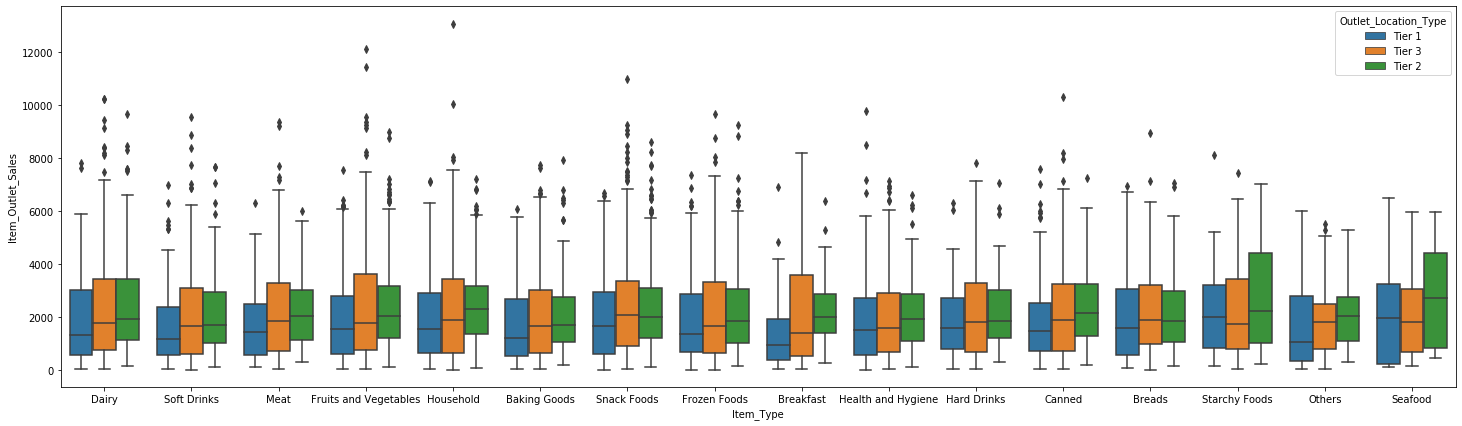

In [131]:
plt.figure(figsize=(25,7))
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',hue='Outlet_Location_Type',data=df)

Quantity of different types of outlets. 

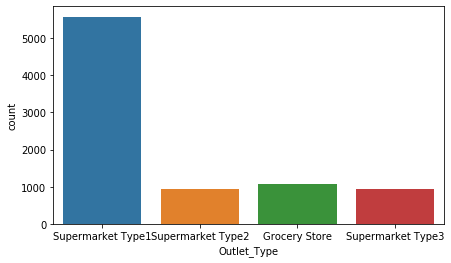

In [132]:
plt.figure(figsize=(7,4))
sns.countplot(df['Outlet_Type'])

FRom the below graph we can conclude that:
1.In Tier 2 cities there are only Supermarket Type 1 outlets.
2.In Tier 3 cities all type of outlets are present.
3.In tier 1 cities there are only two types of outlets present(Supermarket Type 1, Grocery Store).

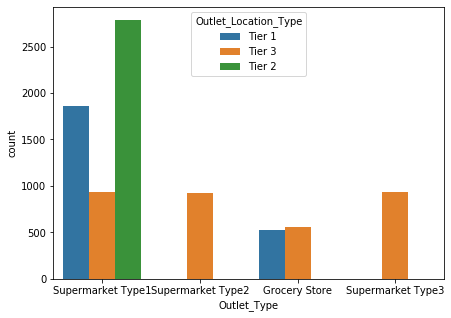

In [133]:
plt.figure(figsize=(7,5))
sns.countplot(df['Outlet_Type'],hue=df['Outlet_Location_Type'])

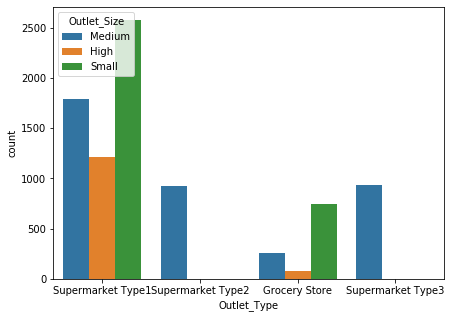

In [134]:
plt.figure(figsize=(7,5))
sns.countplot(df['Outlet_Type'],hue=df['Outlet_Size'])

Sales of outlets according to outlet type.Supermarket Type 3 are having the highest sales.

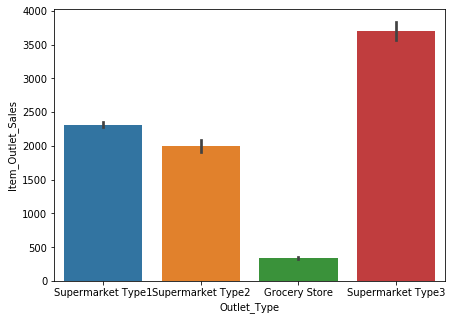

In [135]:
plt.figure(figsize=(7,5))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df)

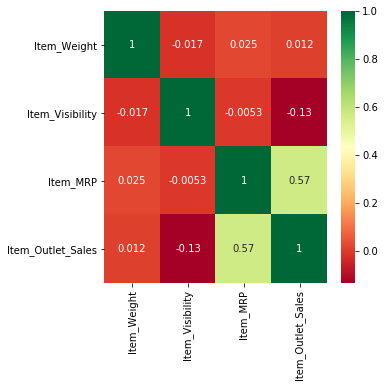

In [138]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [139]:
Fat_content = pd.get_dummies(df['Item_Fat_Content'],drop_first=True)
item_Type = pd.get_dummies(df['Item_Type'],drop_first=True)
Size = pd.get_dummies(df['Outlet_Size'],drop_first=True)
Location_Type = pd.get_dummies(df['Outlet_Location_Type'],drop_first=True)
outlet_Type = pd.get_dummies(df['Outlet_Type'],drop_first=True)

In [140]:
Fat_content1 = pd.get_dummies(test['Item_Fat_Content'],drop_first=True)
item_Type1 = pd.get_dummies(test['Item_Type'],drop_first=True)
Size1 = pd.get_dummies(test['Outlet_Size'],drop_first=True)
Location_Type1 = pd.get_dummies(test['Outlet_Location_Type'],drop_first=True)
outlet_Type1 = pd.get_dummies(test['Outlet_Type'],drop_first=True)

In [141]:
df=pd.concat([df,Fat_content,item_Type,Size,Location_Type,outlet_Type],axis=1)

In [142]:
test=pd.concat([test,Fat_content1,item_Type1,Size1,Location_Type1,outlet_Type1],axis=1)

In [143]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Regular', 'Breads', 'Breakfast', 'Canned',
       'Dairy', 'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods', 'Medium', 'Small',
       'Tier 2', 'Tier 3', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'],
      dtype='object')

In [144]:
df = df.drop(['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'],axis=1)

In [145]:
test = test.drop(['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'],axis=1)
test.shape

(5681, 26)

## Model Building

In [108]:
#separting dependent and independent features.
target=df['Item_Outlet_Sales']
inputs=df.drop(['Item_Outlet_Sales'],axis=1)

In [109]:
target.shape

(8523,)

In [110]:
inputs.shape

(8523, 26)

In [111]:
#Standardization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(inputs)
X = scaler.transform(inputs)

In [112]:
scaler.fit(test)
test_input = scaler.transform(test)
test_input.shape

(5681, 26)

In [113]:
inputs.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Regular', 'Breads',
       'Breakfast', 'Canned', 'Dairy', 'Frozen Foods', 'Fruits and Vegetables',
       'Hard Drinks', 'Health and Hygiene', 'Household', 'Meat', 'Others',
       'Seafood', 'Snack Foods', 'Soft Drinks', 'Starchy Foods', 'Medium',
       'Small', 'Tier 2', 'Tier 3', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'],
      dtype='object')

In [114]:
#Splitting train data into tarin & test for building and testing model.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,target, test_size=0.20, random_state=7)

In [115]:

#Model 1 RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 1000, random_state=51)
rf_reg.fit(x_train,y_train)
y_pred=rf_reg.predict(x_test)


In [116]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5358915132168516

In [117]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

1435602.8227600837

## Hyperparameter Tuning

In [128]:

#Hyperparameter tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators':range(20,2001,10),
         'max_depth':range(5,61,2),
         'min_samples_split':range(200,1201,200)
         }
rand_search = RandomizedSearchCV(rf_reg, param_distributions=params, n_jobs=-1, cv=11)
rand_search.fit(x_train, y_train)
rand_search.best_score_
 

0.597716027047469

In [129]:
rand_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=37,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=200,
                      min_weight_fraction_leaf=0.0, n_estimators=190,
                      n_jobs=None, oob_score=False, random_state=51, verbose=0,
                      warm_start=False)

In [130]:
rf_reg = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=37,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=200,
                      min_weight_fraction_leaf=0.0, n_estimators=190,
                      n_jobs=None, oob_score=False, random_state=51, verbose=0,
                      warm_start=False)
rf_reg.fit(x_train,y_train)
y_pred=rf_reg.predict(x_test)

In [131]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5801276646402134

In [132]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

1298769.4192349866

In [133]:
sales = rf_reg.predict(test_input)

In [134]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 787.3235893267962
MSE: 1298769.4192349866
RMSE: 1139.6356519673236


In [135]:

pred = pd.DataFrame(sales)
sub_df = pd.read_csv('C:/Users/suyog/sample_submission_8RXa3c6.csv')
datasets = pd.concat([sub_df['Item_Identifier'],sub_df['Outlet_Identifier'],pred],axis = 1)
datasets.columns = ['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']
datasets.to_csv("C:/Users/suyog/sample_submission_8RXa3c6.csv",index = False)


In [136]:
dff = pd.read_csv("C:/Users/suyog/sample_submission_8RXa3c6.csv",index_col= 0)

In [137]:
dff.head()

,Outlet_Identifier,Item_Outlet_Sales
Item_Identifier,,
FDW58,OUT049,1686.280052
FDW14,OUT017,1300.217177
NCN55,OUT010,547.110659
FDQ58,OUT017,2428.495742
FDY38,OUT027,5705.654756


In [138]:
dff.to_csv("sample_submission_8RXa3c6",index = False)

In [139]:
dff.head()

,Outlet_Identifier,Item_Outlet_Sales
Item_Identifier,,
FDW58,OUT049,1686.280052
FDW14,OUT017,1300.217177
NCN55,OUT010,547.110659
FDQ58,OUT017,2428.495742
FDY38,OUT027,5705.654756
